In [1]:
!pip install --upgrade numpy
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.55.2 requires numpy<1.23,>=1.18, but you have numpy 1.24.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [2]:
# Load dataset 1
data = np.loadtxt("dataset1.csv", delimiter=",")

In [7]:
# Load the dataset 2

df = pd.read_csv("dataset2.csv", header=None)
data2 = df.to_numpy()

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

data21 = np.loadtxt("dataset2.csv", delimiter=",")
distances = pairwise_distances(data21, metric='euclidean')

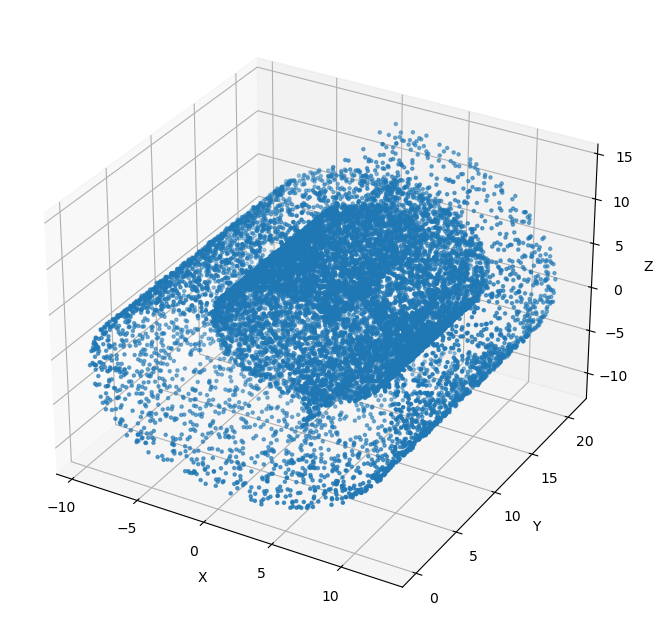

In [3]:
# Plot the 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0], df[1], df[2], s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

The cylindrical spiral structure in the 3D scatterplot suggests that there may be clusters that are arranged in a spiral-like pattern. This can have implications for both K-means clustering and hierarchical clustering.

For K-means clustering, the initial placement of the cluster centers can have a big impact on the resulting clusters. If the initial centers are not well-placed, the algorithm may converge to a suboptimal solution. One approach to address this is to use a more sophisticated initialization method, such as K-means++.

For hierarchical clustering, the spiral structure can make it difficult to determine the appropriate level to cut the dendrogram. If the clusters are arranged in a spiral, it is possible that the hierarchical clustering may not result in distinct clusters that are easy to interpret.

# Lloyd’s algorithm (k-means)

In [9]:
def kmeans(X, k, initialization):
    n_init=10
    best_centers = None
    best_labels = None
    best_cost = np.inf
    for init in range(n_init):
        if (initialization == "kplusplus"):
            # K-means++ initialization
            centers = [X[np.random.choice(X.shape[0])]]
            while len(centers) < k:
                distances = np.array([min([np.linalg.norm(x-c)**2 for c in centers]) for x in X])
                prob = distances / distances.sum()
                cum_prob = prob.cumsum()
                r = np.random.rand()
                ind = np.where(cum_prob >= r)[0][0]
                centers.append(X[ind])
            centers = np.array(centers, dtype=float)  # Fix dtype to float
        elif (initialization == "urand"):
            # Uniform random initialization
            centers = X[np.random.choice(X.shape[0], k, replace=False)]
        labels = np.zeros(X.shape[0])
        cost = np.inf
        while True:
            # Assign each example to the nearest cluster center
            for i in range(X.shape[0]):
                distances = np.linalg.norm(X[i] - centers, axis=1)
                labels[i] = np.argmin(distances)
            # Update cluster centers
            for j in range(k):
                centers[j] = np.mean(X[labels == j], axis=0)
            # Compute cost
            new_cost = np.sum(np.linalg.norm(X - centers[labels.astype(int)], axis=1)**2)
            if new_cost >= cost:
                break
            cost = new_cost
        if cost < best_cost:
            best_centers = centers
            best_labels = labels
            best_cost = cost
    return best_centers, best_labels, best_cost



Clustering is the process of grouping together similar data points based on some similarity measure. The K-means algorithm works by iteratively partitioning the data into K clusters, where K is a predetermined number of clusters specified by the user.

The implemented k-means function which you can find in the notebook "A3.ipynb" takes in three arguments: X, which is the data matrix consisting of n rows (examples) and d columns (features); k, which is the number of clusters desired; and initialization, which is the initialization method used to initialize the cluster centers. There are two initialization methods to choose from: K-means++ initialization and Uniform random initialization.

The function first initializes K cluster centers either randomly or using the K-means++ initialization method. Then, it iteratively assigns each data point to the nearest cluster center and updates the cluster centers based on the mean of the data points in each cluster. This process is repeated until the cost function (which is the sum of squared distances between data points and their assigned cluster centers) no longer improves.

To ensure that the function finds a good clustering solution, the initialization and assignment process is repeated for multiple initializations (n_init=10) and the solution with the lowest cost function is returned.

## dataset1.csv

#### Uniform random initialization

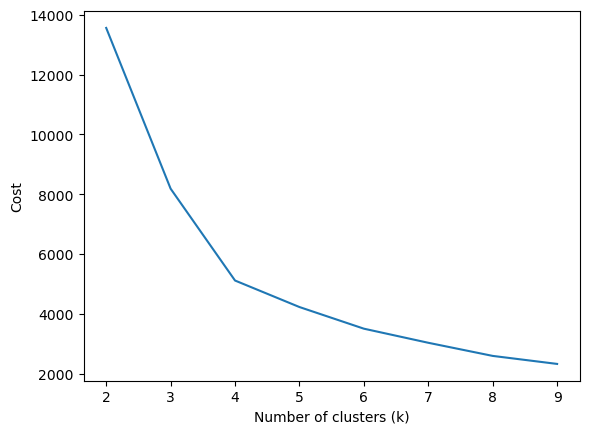

In [15]:
np.random.seed(123)

# Run k-means with different values of k
costs = []
for k in range(2, 10):
    center, label, cost = kmeans(data, k, "urand")
    costs.append(cost)
# Plot cost vs k
plt.plot(range(2, 10), costs)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Cost")
plt.show()

The k-means clustering algorithm was applied with uniform random initialization to dataset1.csv over a range of number of clusters, resulting in the graph ##. The quality of the clustering was measured using the cost, which represents how well the data points are assigned to their respective clusters. Specifically, the cost is calculated as the sum of the squared distances between each data point and its assigned cluster center.

The graph shows that as we increase the number of clusters from 2 to 9, the cost decreases rapidly at first. This is because having more cluster centers allows for a better fit of the data points, which results in a better assignment of the points to their respective clusters. However, as we continue to increase the number of clusters, the cost reduction slows down, eventually reaching a point where adding more clusters does not provide a significant improvement in the clustering quality.

In this particular case, the graph shows that the cost reduction slows down significantly after 4 clusters. Therefore, using uniform random initialization for kmeans, 4 clusters would be a good choice for this dataset. Increasing the number of clusters beyond 4 would not provide a significant improvement in the clustering quality.

#### k-means++ initialization

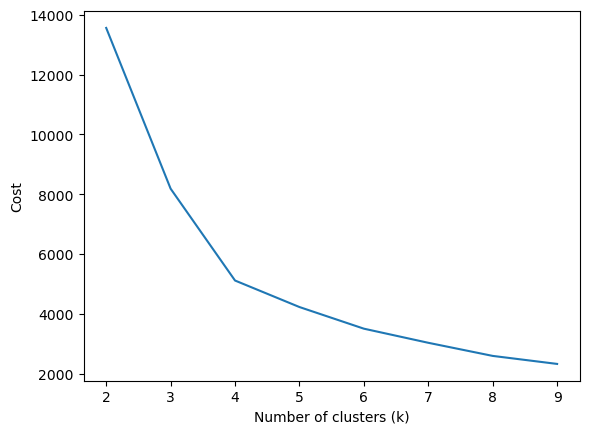

In [18]:
np.random.seed(543)

# Run k-means with different values of k
costs = []
for k in range(2, 10):
    center, label, cost = kmeans(data, k, "kplusplus")
    costs.append(cost)
# Plot cost vs k
plt.plot(range(2, 10), costs)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Cost")
plt.show()

The k-means++ initialization method is often used to improve the quality of clustering. This method starts by randomly selecting one example from the dataset as the first cluster center, and then iteratively selects the next center from the remaining examples with a probability proportional to the squared distance to the closest existing center. By doing so, the initial cluster centers are well-separated, leading to better clustering and a lower cost.

Interestinglyon this dataset, even with the k-means++ initialization method, the rate of decrease in the cost still slows down after k=4, similar to when k-means is used with uniform random initialization. This indicates that further increasing the number of clusters beyond this point does not significantly improve the quality of clustering. Therefore, in this case, the type of initialization method used does not seem to have a significant impact on the optimal number of clusters.

## dataset2.csv

Cluster 0
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
outputting plot


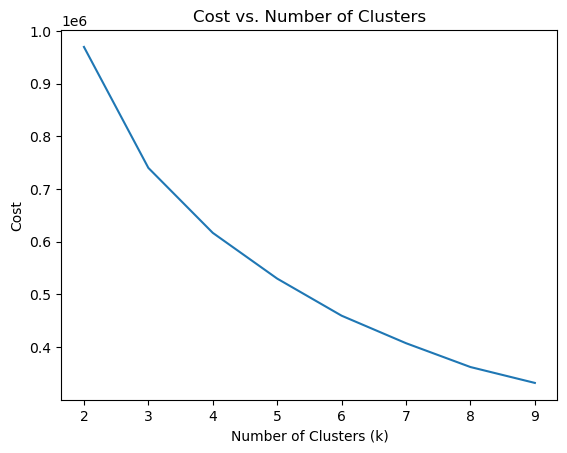

In [8]:
costs = []
k=0
print(f'Cluster {k}')
for k in range(2, 10):
    centers, labels, cost = kmeans(data2, k=k, initialization="urand")
    costs.append(cost)
    print(f'Cluster {k}')

print("outputting plot")
# Plot the cost as k increases
plt.plot(range(2, 10), costs)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Clusters')
plt.show()


Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
outputting plot


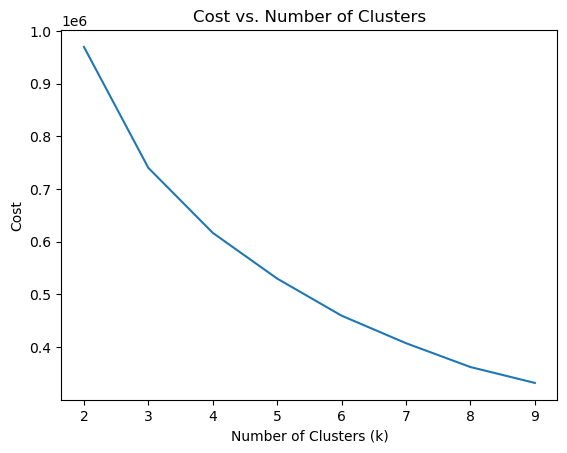

In [10]:
costs = []
for k in range(2, 10):
    centers, labels, cost = kmeans(data2, k=k, initialization="kplusplus")
    costs.append(cost)
    print(f'Cluster {k}')

print("outputting plot")
# Plot the cost as k increases
plt.plot(range(2, 10), costs)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Clusters')
plt.show()

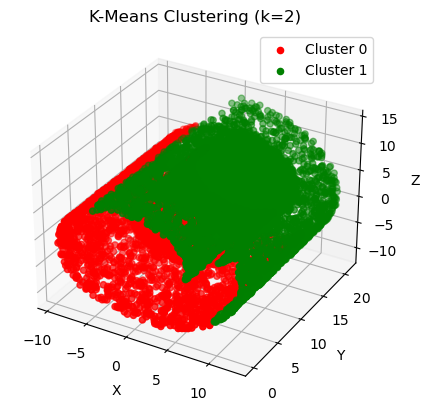

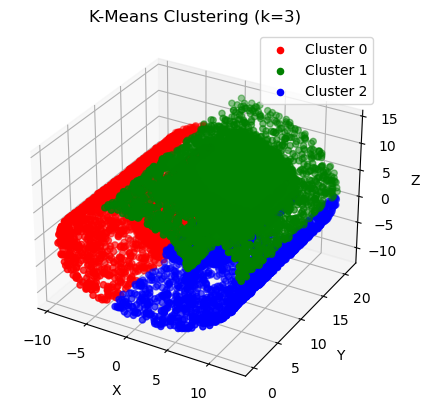

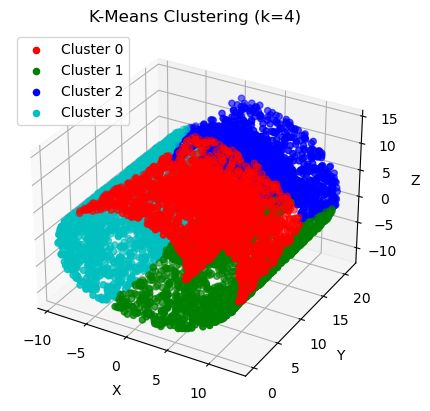

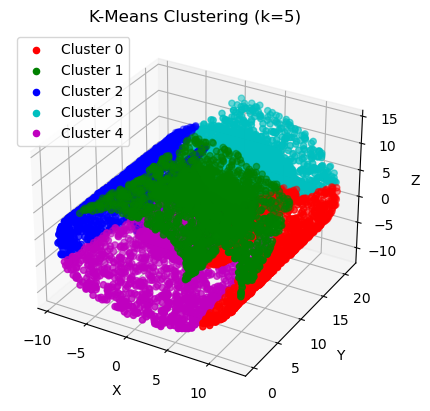

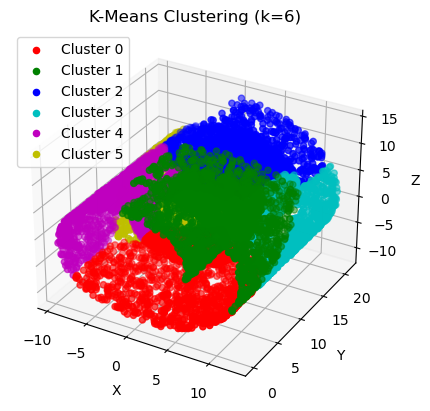

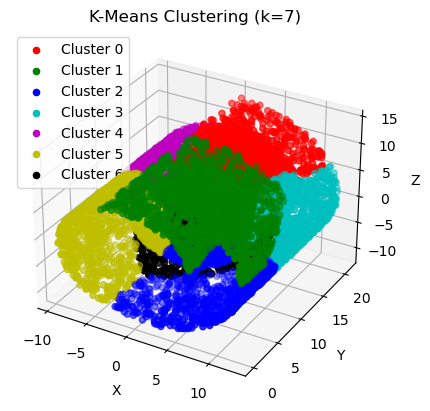

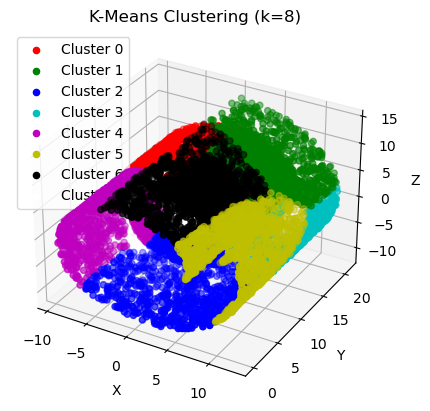

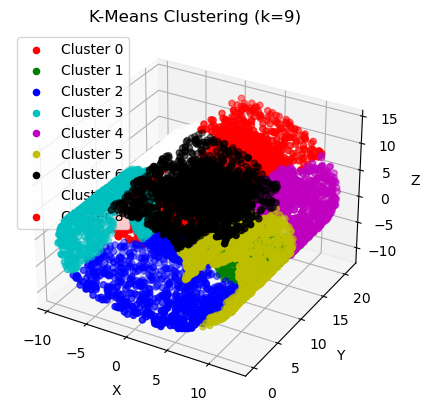

In [25]:
np.random.seed(23)

# Run k-means with different values of k
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'r', 'g', 'b'] # set colors for each cluster
costs = []
for k in range(2, 10):
    centers, labels, cost = kmeans(data2, k=k, initialization="urand")
    costs.append(cost)

    # Create 3D scatterplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        ax.scatter(data2[labels==i,0], data2[labels==i,1], data2[labels==i,2], 
                   color=colors[i], cmap='viridis', label=f'Cluster {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()


The ideal plot for a clustering analysis would show clear separation of clusters in the 3D space with minimal overlap between them. However, as the number of clusters (k) increases, it can become more challenging to maintain distinct separation between the clusters. In the given graphs, as k increases, the clusters begin to overlap more, which can make it difficult to interpret the results accurately.

It is generally desirable to have more clusters in a clustering analysis, as this can lead to greater precision and specificity in the results. However, it is important to balance this with the need for clear separation between the clusters, as too much overlap can make it difficult to distinguish between them.

In the given examples, k=4 appears to be an ideal choice, as it strikes a good balance between the number of clusters and the degree of separation between them. When k=5, for example, there is a lot overlap between cluster 0 and cluster 1, which can make it more challenging to interpret the results accurately.

Overall, the key to achieving an ideal plot for a clustering analysis is to carefully consider the number of clusters and to select a value of k that balances the need for greater specificity with the need for clear separation between the clusters.

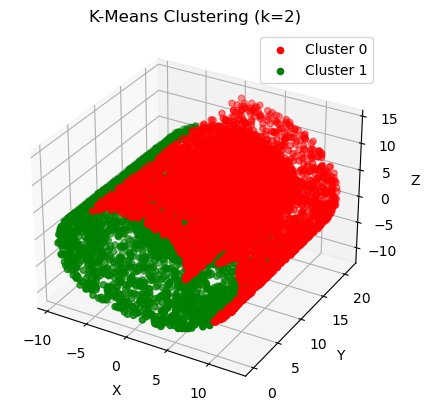

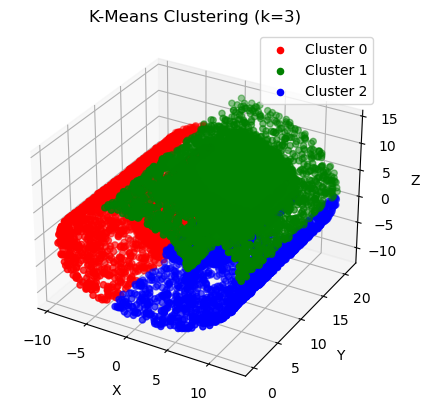

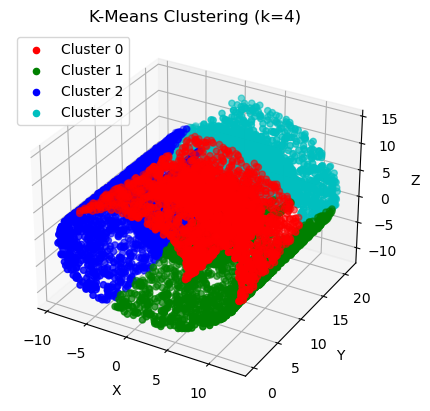

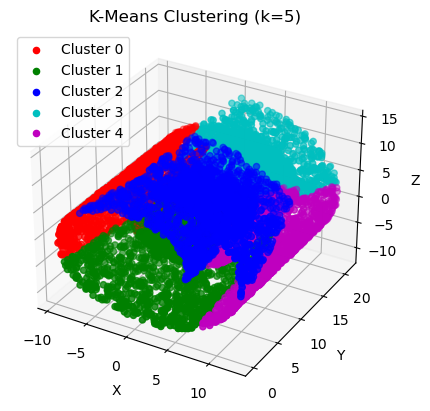

In [27]:
np.random.seed(223)

# Run k-means with different values of k
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'khaki', 'pink'] # set colors for each cluster
costs = []
for k in range(2, 6):
    centers, labels, cost = kmeans(data2, k=k, initialization="kplusplus")
    costs.append(cost)

    # Create 3D scatterplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        ax.scatter(data2[labels==i,0], data2[labels==i,1], data2[labels==i,2], 
                   color=colors[i], cmap='viridis', label=f'Cluster {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()


# Hierarchical agglomerative clustering

## dataset1.csv

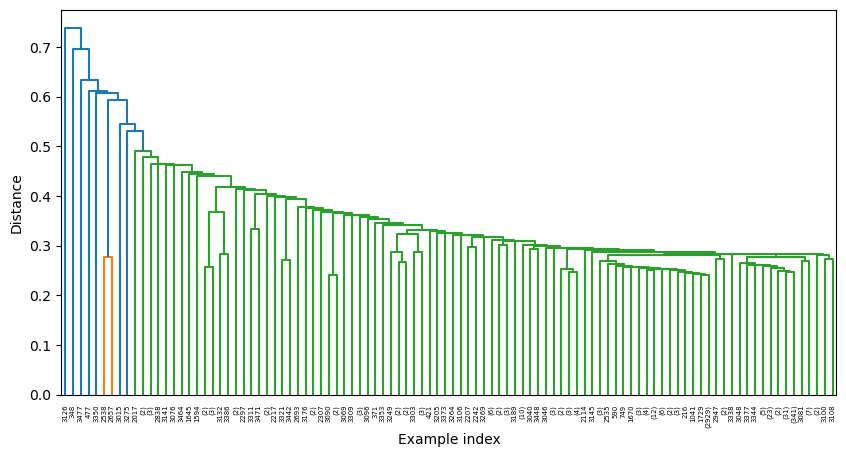

In [4]:
# Perform hierarchical clustering
Z_single = linkage(data, method="single", metric="euclidean")

# Plot dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
dendrogram(Z_single, truncate_mode="lastp", p=100)
plt.xlabel("Example index")
plt.ylabel("Distance")
plt.show()

In [5]:
from scipy.cluster.hierarchy import fcluster

# Loop over a range of thresholds and output the number of clusters for each
for threshold in np.arange(0.2, 0.7, 0.0125):
    # Use fcluster to determine the final number of clusters
    clusters = fcluster(Z_single, threshold, criterion='distance')

    # Print the number of clusters
    n_clusters = len(set(clusters))
    print("Threshold:", threshold, "| Number of clusters:", n_clusters)

Threshold: 0.2 | Number of clusters: 153
Threshold: 0.21250000000000002 | Number of clusters: 133
Threshold: 0.22500000000000003 | Number of clusters: 119
Threshold: 0.23750000000000004 | Number of clusters: 103
Threshold: 0.25000000000000006 | Number of clusters: 92
Threshold: 0.26250000000000007 | Number of clusters: 78
Threshold: 0.2750000000000001 | Number of clusters: 70
Threshold: 0.2875000000000001 | Number of clusters: 59
Threshold: 0.3000000000000001 | Number of clusters: 52
Threshold: 0.3125000000000001 | Number of clusters: 47
Threshold: 0.3250000000000001 | Number of clusters: 42
Threshold: 0.33750000000000013 | Number of clusters: 37
Threshold: 0.35000000000000014 | Number of clusters: 35
Threshold: 0.36250000000000016 | Number of clusters: 31
Threshold: 0.37500000000000017 | Number of clusters: 27
Threshold: 0.3875000000000002 | Number of clusters: 25
Threshold: 0.4000000000000002 | Number of clusters: 23
Threshold: 0.4125000000000002 | Number of clusters: 20
Threshold: 0

k=3

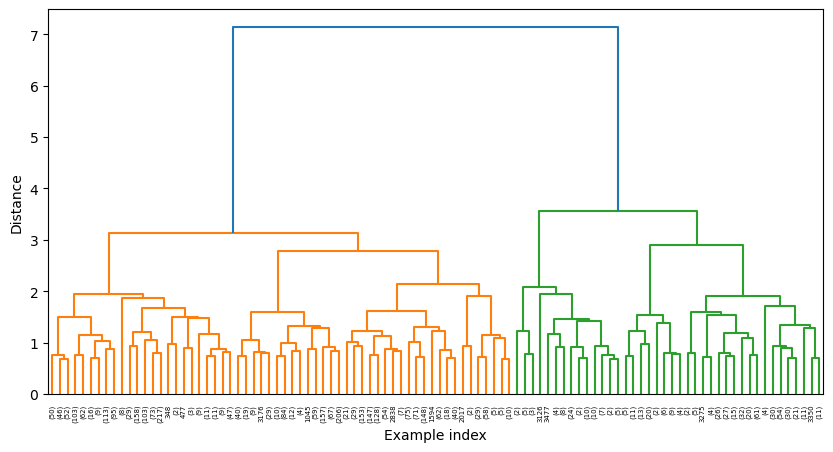

In [32]:
# Perform hierarchical clustering
Z = linkage(data, method="average", metric="euclidean")

# Plot dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=100)
plt.xlabel("Example index")
plt.ylabel("Distance")
plt.show()

k = 2

## dataset2.csv

In [ ]:
print("HERE")

# Compute the hierarchical clustering using single linkage
Z = linkage(data21, method='single', metric='euclidean')

print("HERE")

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=12, ax=ax)
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')
ax.set_title('Dendrogram')
plt.show()


HERE


In [ ]:


# Perform hierarchical clustering using single linkage
Z_single = linkage(distances, method='single')

# Plot the dendrogram for single linkage
plt.figure(figsize=(12, 8))
dendrogram(Z_single)
plt.xlabel('Example index')
plt.ylabel('Distance')
plt.title('Dendrogram (Single linkage)')
plt.show()